In [1]:
import pandas as pd

In [3]:
# Read CSV file
csv_file_path = 'LIFE.Merged.D.A.November.11.2024.csv'  
data = pd.read_csv(csv_file_path)
data

,V1,MaskID,Time,TimeN,days_accel,valid_days,minutes_wear,minutes_nonwear,activity_total,steps_total,...,ZhST,SEX,filter_$,ZTGR1,ZTGR2,ZTQWB,Zst,Zmin760,HEI,ZLDL_CHOL_CALCULATION
0,0,10020,SV1,1,-10,6,711.1666667,642.3333333,102872.5,2634.833333,...,,1,0,,,,.0370951100477844,.518077178394756,.805555555555555,.820680712745175
1,1,10020,F06,2,176,4,726.75,713.25,63984,1641,...,,1,0,,,,-.605569253582551,-.135199648159411,,.820680712745175
2,2,10020,F12,3,358,5,717.8,609.4,81706.6,1760,...,-.215581911842835,1,1,.342943633391193,.381572466155057,.557505878977451,-.528617659454433,-.249706597558682,,.820680712745175
3,3,10020,F18,4,,,,,,,...,,1,0,,,,,,,.820680712745175
4,4,10020,F24,5,714,1,815,625,129339,3475,...,-.372883789871789,1,0,,,,.580390608862548,.1290471581466,,.820680712745175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10282,10282,49921,PIV,,1397,4,785.25,654.75,70301,2048.75,...,,,,,,,-.341896879584737,-.663693260771432,,
10283,10283,49921,CLS,,,,,,,,...,,,,,,,,,,
10284,10284,49949,SV1,1,-17,10,763.5,622.5,154652.8,4056.3,...,,1,0,,,,.956289446397628,1.56919225251436,,-.656452237845181
10285,10285,49949,F06,2,172,7,879.4285714,485.8571429,204013.7143,6440.285714,...,,1,0,,,,2.49789869909475,1.95360843984625,,-.656452237845181


In [4]:
# Display all column names
print(data.columns)

# Dataset info (non-missing values, data types, etc.)
print(data.info())

Index(['V1', 'MaskID', 'Time', 'TimeN', 'days_accel', 'valid_days',
       'minutes_wear', 'minutes_nonwear', 'activity_total', 'steps_total',
       ...
       'ZhST', 'SEX', 'filter_$', 'ZTGR1', 'ZTGR2', 'ZTQWB', 'Zst', 'Zmin760',
       'HEI', 'ZLDL_CHOL_CALCULATION'],
      dtype='object', length=962)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10287 entries, 0 to 10286
Columns: 962 entries, V1 to ZLDL_CHOL_CALCULATION
dtypes: int64(2), object(960)
memory usage: 75.5+ MB
None


In [27]:
# Variables of interest
variables_of_interest = {
    "Physical Activity": "ZMVPA",
    "Sleep": "Zsum_PSQI",
    "BMI": "ZBMI",
    "Blood Glucose": "ZMetSGlucose",
    "Blood Pressure": "ZMetSBP",
    "Smoking": "ZSmoke",
    "Nutrition": "HEI",
    "LDL": "LDL_CHOL_CALCULATION"
}

# Create a filtered dataset with these variables
filtered_data = data[list(variables_of_interest.values())]

# Adding the timepoint column for grouping
filtered_data["TimeN"] = data["TimeN"]  

# Preview the filtered dataset
print(filtered_data.head())

                ZMVPA          Zsum_PSQI                ZBMI  \
0   -.359744718495008                      -.131865508501549   
1  -.0667284248135586  -.902652869719727  -.0983637258713936   
2   -.209059919556287                                          
3                      -.902652869719727  -.0146092692960054   
4   .0222099907423275                                          

        ZMetSGlucose            ZMetSBP             ZSmoke               HEI  \
0  -1.02912414069672  -1.94326485967618  -.353610530477523  .805555555555555   
1  -1.02912414069672  -1.94326485967618  -.353610530477523                     
2  -1.02912414069672  -1.94326485967618  -.353610530477523                     
3  -1.02912414069672  -1.94326485967618  -.353610530477523                     
4  -1.02912414069672  -1.94326485967618  -.353610530477523                     

  LDL_CHOL_CALCULATION TimeN  
0                  120     1  
1                  120     2  
2                  120     3  
3         

/tmp/ipykernel_369166/2114963998.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["TimeN"] = data["TimeN"]


In [28]:
# Group by the timepoint column
grouped_data = filtered_data.groupby("TimeN")

# Count non-missing entries for each variable
counts_per_variable = grouped_data.apply(lambda group: group.notnull().sum())

# Step 11: Preview the results
print(counts_per_variable)

       ZMVPA  Zsum_PSQI  ZBMI  ZMetSGlucose  ZMetSBP  ZSmoke   HEI  \
TimeN                                                                
        1745       1745  1745          1745     1745    1745  1745   
1       1634       1634  1634          1634     1634    1634  1634   
2       1557       1557  1557          1557     1557    1557  1557   
3       1405       1405  1405          1405     1405    1405  1405   
4       1455       1455  1455          1455     1455    1455  1455   
5       1472       1472  1472          1472     1472    1472  1472   
6       1019       1019  1019          1019     1019    1019  1019   

       LDL_CHOL_CALCULATION  TimeN  
TimeN                               
                       1745   1745  
1                      1634   1634  
2                      1557   1557  
3                      1405   1405  
4                      1455   1455  
5                      1472   1472  
6                      1019   1019  


In [29]:
# Summary table
summary_table = counts_per_variable.drop(columns=["TimeN"])  # Drop time column count
summary_table = summary_table.rename(columns=variables_of_interest)  # Rename columns for clarity

# Display the summary table
print(summary_table)

       ZMVPA  Zsum_PSQI  ZBMI  ZMetSGlucose  ZMetSBP  ZSmoke   HEI  \
TimeN                                                                
        1745       1745  1745          1745     1745    1745  1745   
1       1634       1634  1634          1634     1634    1634  1634   
2       1557       1557  1557          1557     1557    1557  1557   
3       1405       1405  1405          1405     1405    1405  1405   
4       1455       1455  1455          1455     1455    1455  1455   
5       1472       1472  1472          1472     1472    1472  1472   
6       1019       1019  1019          1019     1019    1019  1019   

       LDL_CHOL_CALCULATION  
TimeN                        
                       1745  
1                      1634  
2                      1557  
3                      1405  
4                      1455  
5                      1472  
6                      1019  


In [12]:
summary_table.to_csv('data_collection_summary.csv', index=True)
print("Summary table saved to 'data_collection_summary.csv'")

Summary table saved to 'data_collection_summary.csv'


In [30]:
unique_participants = data["MaskID"].nunique()  
print(f"Number of unique participants: {unique_participants}")

Number of unique participants: 1634


In [31]:
timepoint_rows = data.groupby("TimeN").size()
print(timepoint_rows)

TimeN
     1745
1    1634
2    1557
3    1405
4    1455
5    1472
6    1019
dtype: int64


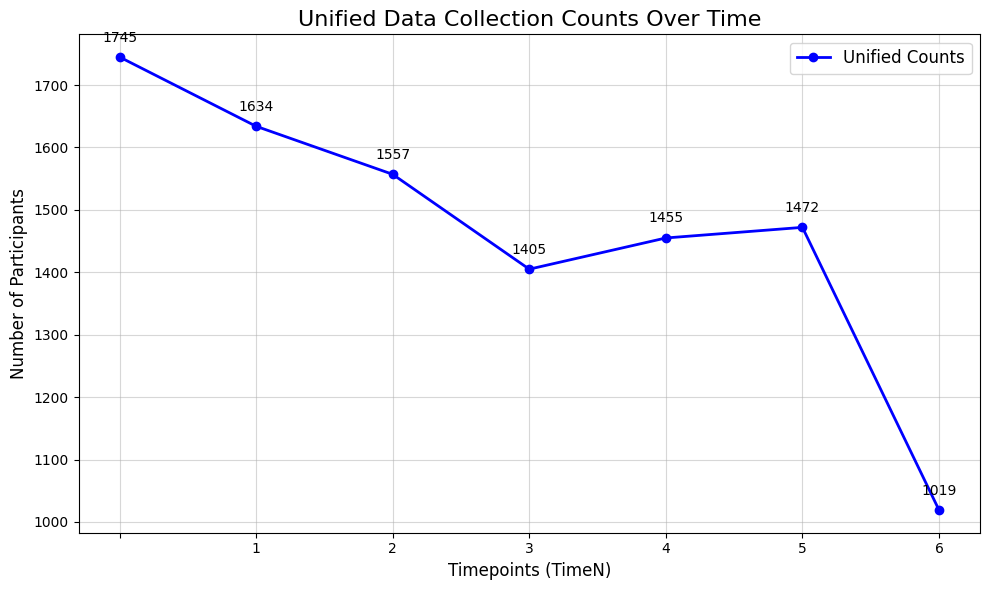

In [35]:
import matplotlib.pyplot as plt

# Create a single plot for unified data collection counts
plt.figure(figsize=(10, 6))

# Plot a single line for the unified counts
plt.plot(summary_table.index, summary_table["ZMVPA"], marker='o', label="Unified Counts", color="blue", linewidth=2)

# Annotate data points
for time, count in zip(summary_table.index, summary_table["ZMVPA"]):
    plt.text(time, count + 20, str(count), ha='center', va='bottom', fontsize=10, color="black")

# Customize the plot
plt.title("Unified Data Collection Counts Over Time", fontsize=16)
plt.xlabel("Timepoints (TimeN)", fontsize=12)
plt.ylabel("Number of Participants", fontsize=12)
plt.legend(loc="upper right", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Display the plot
plt.show()

In [36]:
# Check if any participant has missing data for some variables but not others
missing_rows = data[(data["ZMVPA"].isnull()) | (data["Zsum_PSQI"].isnull()) | 
                    (data["ZBMI"].isnull()) | (data["ZMetSGlucose"].isnull()) | 
                    (data["ZMetSBP"].isnull()) | (data["ZSmoke"].isnull()) | 
                    (data["HEI"].isnull()) | (data["LDL_CHOL_CALCULATION"].isnull())]
print(f"Number of rows with missing data for at least one variable: {len(missing_rows)}")

Number of rows with missing data for at least one variable: 0
